# Basic Convolutional Neural Network (CNN)
We will train and evaluate a CNN on the Fashion MNIST dataset. It consists of 70.000 grayscale images of 28x28 pixels each, and there are 10 classes.

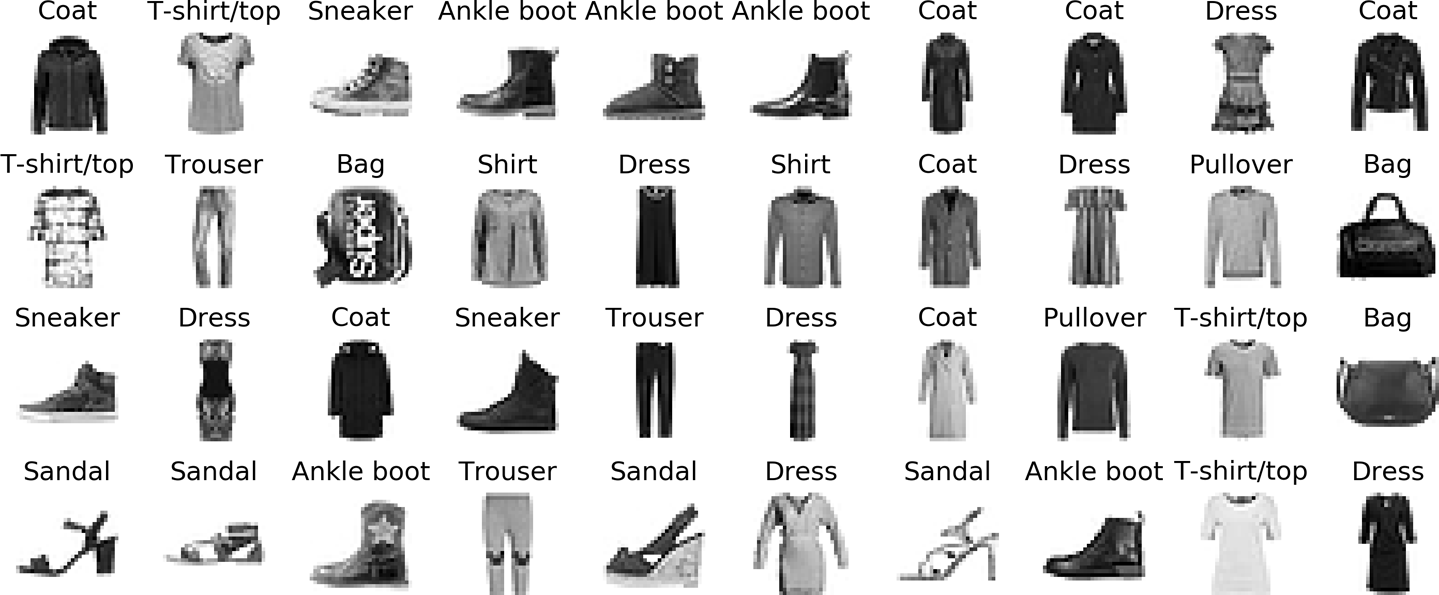

## Setup

In [1]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Load the data
Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# Show the size and dimension of the dataset.
X_train_full.shape

(60000, 28, 28)

In [4]:
# Each pixel intensity is represented as a byte (0 to 255).
X_train_full.dtype

dtype('uint8')

In [5]:
# Reshape training and test sets so that a single color channel is added as the fourth dimension (not necessary)
X_train_full = np.reshape(X_train_full, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))
X_train_full.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# Split the full training set into a validation set and a (smaller) training set,
# and scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [7]:
# The labels are the class IDs (represented as uint8), from 0 to 9.
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Create a CNN

In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', padding="SAME", 
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

### Show information about the model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [11]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compile the model
You must at least specify the loss function and the optimizer to use. You can also specify a list of additional metrics to use during training and evaluation.

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(momentum=0.9),
              metrics=["accuracy"])

## Train the model

In [13]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


2023-03-21 13:31:31.131828: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 96s 56ms/step - loss: 0.8840 - accuracy: 0.6724 - val_loss: 0.4232 - val_accuracy: 0.8520
Epoch 2/20
1719/1719 [==============================] - 96s 56ms/step - loss: 0.4899 - accuracy: 0.8302 - val_loss: 0.3437 - val_accuracy: 0.8734
Epoch 3/20
1719/1719 [==============================] - 96s 56ms/step - loss: 0.4057 - accuracy: 0.8576 - val_loss: 0.3113 - val_accuracy: 0.8812
Epoch 4/20
1719/1719 [==============================] - 97s 56ms/step - loss: 0.3647 - accuracy: 0.8745 - val_loss: 0.2674 - val_accuracy: 0.9046
Epoch 5/20
1719/1719 [==============================] - 97s 56ms/step - loss: 0.3325 - accuracy: 0.8845 - val_loss: 0.2749 - val_accuracy: 0.8992
Epoch 6/20
1719/1719 [==============================] - 98s 57ms/step - loss: 0.3088 - accuracy: 0.8939 - val_loss: 0.2578 - val_accuracy: 0.9060
Epoch 7/20
1719/1719 [==============================] - 101s 59ms/step - loss: 0.2924 - accuracy: 0.8997 - val_loss: 0.2614 - val_accur

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

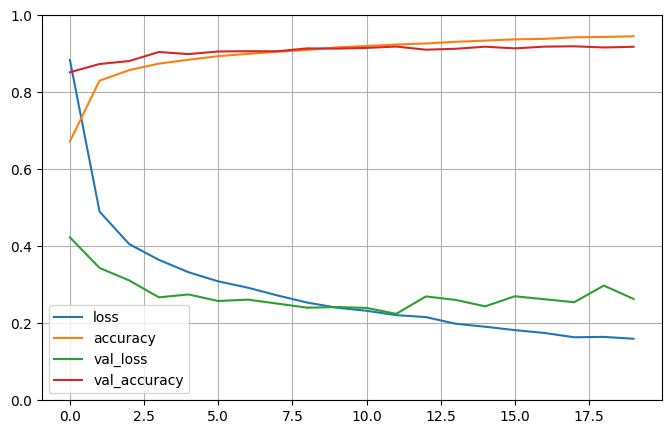

In [15]:
# Show the learning curves.
# (The training curves should be shifted half an epoch to the left to be completely comparable with
# the validation curves).

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate the model.

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.2963 - accuracy: 0.9142


[0.296268105506897, 0.9142000079154968]